In [31]:
import numpy as np
import pandas as pd

import pytraj as pt
import pyemma

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import glob

import molpx

from collections import OrderedDict
from collections import defaultdict

In [2]:
rf0=pt.load('./parm_rst/closed6_dry_rot0.rst7', './parm_rst/closed6_dry_rot0.parm7')
rf1=pt.load('./parm_rst/closed6_dry_rot1.rst7', './parm_rst/closed6_dry_rot1.parm7')
rf2=pt.load('./parm_rst/closed6_dry_rot2.rst7', './parm_rst/closed6_dry_rot2.parm7')
rf3=pt.load('./parm_rst/closed6_dry_rot3.rst7', './parm_rst/closed6_dry_rot3.parm7')
rf4=pt.load('./parm_rst/closed6_dry_rot4.rst7', './parm_rst/closed6_dry_rot4.parm7')
rf5=pt.load('./parm_rst/closed6_dry_rot5.rst7', './parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('./parm_rst/open10_dry.rst7', './parm_rst/open10_dry.parm7')

In [3]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list = sorted(glob(indir+'/*.nc'))
traj_list

['./traj_dry_open_closed_adapt_all/adapt1_dry_1.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_10.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_100.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_101.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_102.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_105.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_11.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_110.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_114.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_115.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_117.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_118.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_125.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_129.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_13.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_132.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_133.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_134.nc',
 './traj_dry_op

In [4]:
results_open=[]
results_closed=[]
for t in traj_list:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open.append(rmsd_open)

In [5]:
Y=[]
for i in range(0,len(results_open)):  
    Z=[]
    for j in range(0,len(results_open[i])):
        a=np.array([results_closed[i][j],results_open[i][j]])
        Z.append(a)
    Z=np.array(Z)
    Y.append(Z)
print(len(Y))
print(len(Y[0]))
print(len(Y[0][0]))

146
1000
2


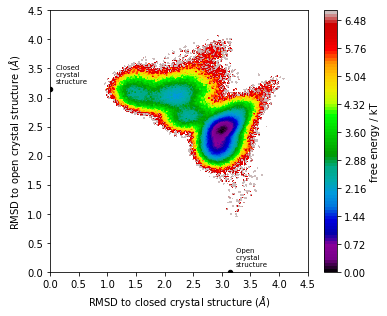

In [29]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1], nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="o")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="o")

ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_labels.png', dpi=800)

In [6]:
n_clusters = 14
clustering = pyemma.coordinates.cluster_kmeans(Y,k=n_clusters, max_iter=1000, fixed_seed=True,
                                               n_jobs=1, init_strategy='uniform')
cc_x = clustering.clustercenters[:, 0]
cc_y = clustering.clustercenters[:, 1]

In [27]:
def plot_labels(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(clustering.clustercenters)):
        plt.text(clustering.clustercenters[i][0]+0.02, clustering.clustercenters[i][1]+0.02, 
                 i, fontsize=7, color='white')

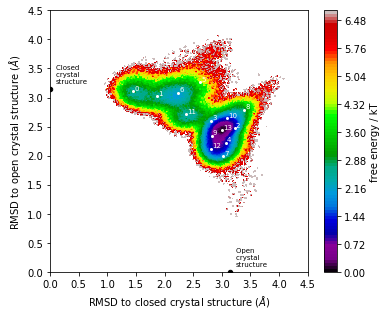

In [28]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1], nbins=200,ax=ax, cbar=True)

ax.plot(cc_x, cc_y, linewidth=0, marker='o', markersize=2, color='white')
plot_labels(ax=ax)

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="o")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="o")

ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_cluster.png', dpi=800)

In [16]:
def plot_labels(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(clustering.clustercenters)):
        plt.text(clustering.clustercenters[i][0]+0.04, clustering.clustercenters[i][1]+0.04, 
                 i, fontsize=9, color='white')

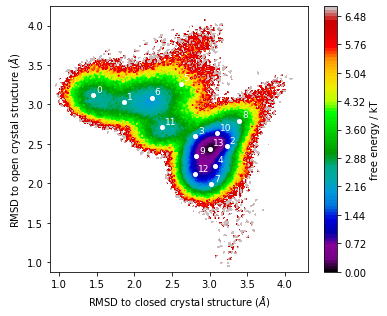

In [17]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1], nbins=200,ax=ax, cbar=True)

ax.plot(cc_x, cc_y, linewidth=0, marker='o', markersize=4, color='white')
plot_labels(ax=ax)

#ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
#ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

#ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

#ax.set_xticks(np.arange(0, 5, 0.5))
#ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_cluster_zoom.png', dpi=800)

In [32]:
labels = np.concatenate(clustering.dtrajs)
mapping = defaultdict(lambda : [])
for i, label in enumerate(labels):
    mapping[label].append(i)
for i in range(0,len(clustering.clustercenters)):
    print('size of cluster %d: %d structures' % (i, len(mapping[i])))

size of cluster 0: 32921 structures
size of cluster 1: 32602 structures
size of cluster 2: 51790 structures
size of cluster 3: 36512 structures
size of cluster 4: 62597 structures
size of cluster 5: 17381 structures
size of cluster 6: 41168 structures
size of cluster 7: 28865 structures
size of cluster 8: 20569 structures
size of cluster 9: 65799 structures
size of cluster 10: 49601 structures
size of cluster 11: 34028 structures
size of cluster 12: 52463 structures
size of cluster 13: 95015 structures


In [33]:
data_sample, geoms = molpx.generate.sample(traj_list, topfile, clustering, n_geom_samples=200, n_points=200)

In [35]:
for i in range(0,len(clustering.clustercenters)):
    geoms[i].save('./rep_struct_1/{}.pdb'.format(i))

## PES and clustering for MD simulations with IPA

In [36]:
indir = './traj_IPA_dry'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list_ipa = sorted(glob(indir+'/*.nc'))
traj_list_ipa

['./traj_IPA_dry/open_ipa_dry_1.nc',
 './traj_IPA_dry/open_ipa_dry_2.nc',
 './traj_IPA_dry/open_ipa_dry_3.nc',
 './traj_IPA_dry/open_ipa_dry_4.nc',
 './traj_IPA_dry/open_ipa_dry_5.nc']

In [37]:
results_open_ipa=[]
results_closed_ipa=[]
for t in traj_list_ipa:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_ipa=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_ipa.append(rmsd_closed_ipa)
    
    rmsd_open_ipa=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_ipa.append(rmsd_open_ipa)

In [38]:
Y_ipa=[]
for i in range(0,len(results_open_ipa)):  
    Z_ipa=[]
    for j in range(0,len(results_open_ipa[i])):
        a_ipa=np.array([results_closed_ipa[i][j],results_open_ipa[i][j]])
        Z_ipa.append(a_ipa)
    Z_ipa=np.array(Z_ipa)
    Y_ipa.append(Z_ipa)

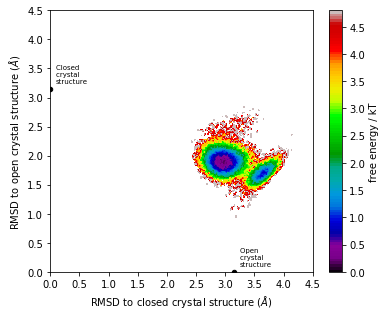

In [39]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(np.vstack(Y_ipa)[:, 0], np.vstack(Y_ipa)[:, 1], nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="o")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="o")

ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_IPA_labels.png', dpi=800)

In [105]:
n_clusters_ipa = 2
clustering_ipa = pyemma.coordinates.cluster_kmeans(Y_ipa,k=n_clusters_ipa, max_iter=1000, fixed_seed=True,
                                               n_jobs=1, init_strategy='uniform')
cc_ipa_x = clustering_ipa.clustercenters[:, 0]
cc_ipa_y = clustering_ipa.clustercenters[:, 1]

In [106]:
def plot_labels_ipa(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(clustering_ipa.clustercenters)):
        plt.text(clustering_ipa.clustercenters[i][0]+0.02, clustering_ipa.clustercenters[i][1]+0.02, 
                 i, fontsize=7, color='white')

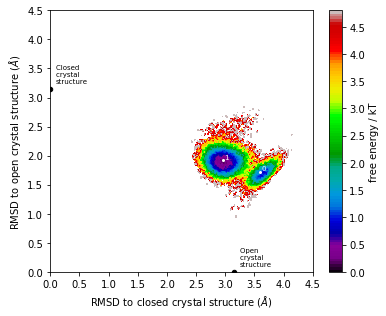

In [107]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(np.vstack(Y_ipa)[:, 0], np.vstack(Y_ipa)[:, 1], nbins=100,ax=ax, cbar=True)

ax.plot(cc_ipa_x, cc_ipa_y, linewidth=0, marker='o', markersize=2, color='white')
plot_labels_ipa(ax=ax)

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="o")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="o")

ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_IPA_cluster.png', dpi=800)

In [108]:
def plot_labels_ipa(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(clustering_ipa.clustercenters)):
        plt.text(clustering_ipa.clustercenters[i][0]+0.04, clustering_ipa.clustercenters[i][1]+0.04, 
                 i, fontsize=12, color='white')

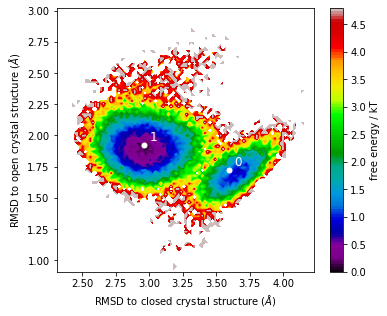

In [109]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(np.vstack(Y_ipa)[:, 0], np.vstack(Y_ipa)[:, 1], nbins=100,ax=ax, cbar=True)

ax.plot(cc_ipa_x, cc_ipa_y, linewidth=0, marker='o', markersize=5, color='white')
plot_labels_ipa(ax=ax)

#ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="o")
#ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="o")

#ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
#ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

#ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

#ax.set_xticks(np.arange(0, 5, 0.5))
#ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_IPA_cluster_zoom.png', dpi=800)

In [110]:
labels_ipa = np.concatenate(clustering_ipa.dtrajs)
mapping_ipa = defaultdict(lambda : [])
for i, label in enumerate(labels_ipa):
    mapping_ipa[label].append(i)
for i in range(0,len(clustering_ipa.clustercenters)):
    print('size of cluster %d: %d structures' % (i, len(mapping_ipa[i])))

size of cluster 0: 12389 structures
size of cluster 1: 38611 structures


In [113]:
data_sample_ipa, geoms_ipa = molpx.generate.sample(traj_list_ipa, topfile, clustering_ipa, 
                                                   n_geom_samples=10, n_points=200)

In [114]:
for i in range(0,len(clustering_ipa.clustercenters)):
    geoms_ipa[i].save('./rep_struct_ipa_1/{}.pdb'.format(i))